## Etapas
-	Entendimento do negócio
-	Compreensão dos dados
-	Tratamento e Limpeza dos dados
-	Analise extrair informações relevantes pra conseguir responder perguntas

# Proposta

A distribuidora de vinhos **FIAPWine** decidiu expandir seus horizontes e agora está importando vinhos tintos e branco portugueses, mais especificamente a marca "Vinho Verde", que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

Fui designado para fazer as análises nos vinhos tintos, então é necessário que você siga os seguintes passos:

1. Importe o dataset "winequality-red.csv" que pode ser baixado no seguinte link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

2. Utilize o Pandas para verificar a estrutura do dataset (número de linhas, colunas, tipos de dados das colunas, etc).

3. Limpe o dataset, removendo linhas duplicadas e tratando valores faltantes.

4. Utilize o Matplotlib para visualizar as seguintes informações:

    / a. Distribuição da acidez volátil por qualidade do vinho?

    / b. Distribuição do teor alcóolico por qualidade do vinho?

    / c. Relação entre acidez volátil e teor alcóolico?

    / d. Relação entre acidez volátil e qualidade do vinho?

5. Análise os resultados e responda às seguintes perguntas:

    / d. Qual a acidez volátil média dos vinhos de qualidade elevada?

    / d. Qual a relação entre teor alcóolico e qualidade do vinho?

    / d. Há alguma relação entre acidez volátil e teor alcóolico?
    
    / d. Há alguma relação entre acidez volátil e qualidade do vinho?

In [ ]:
#Lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_winequality = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Análise Exploratória (EAD)

In [3]:
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_winequality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df_winequality.shape

(1599, 12)

In [6]:
df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Limpeza e manipulação dos dados

In [ ]:
# Criando copia do dataframe
df_wine_copia = df_winequality.copy()
df_wine_copia.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Mantendo só as colunas necessárias para a proposta pedida

In [8]:
df_wine_copia = df_wine_copia.drop(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'density', 'sulphates'], axis=1)
df_wine_copia

,volatile acidity,alcohol,quality
0,0.700,9.4,5
1,0.880,9.8,5
2,0.760,9.8,5
3,0.280,9.8,6
4,0.700,9.4,5
...,...,...,...
1594,0.600,10.5,5
1595,0.550,11.2,6
1596,0.510,11.0,6
1597,0.645,10.2,5


In [ ]:
# Traduzindo e Renomeando Colunas

df_wine_copia = df_wine_copia.rename(columns={
    'volatile acidity' : 'acidez_volatil',
    'alcohol' : 'teor_alcoolico',
    'quality' : 'qualidade_vinho'
})

In [10]:
df_wine_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   acidez_volatil   1599 non-null   float64
 1   teor_alcoolico   1599 non-null   float64
 2   qualidade_vinho  1599 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 37.6 KB


In [ ]:
#Conferindo se existe colunas nulas
df_wine_copia.isnull().sum()

acidez_volatil     0
teor_alcoolico     0
qualidade_vinho    0
dtype: int64

In [ ]:
# Quantidades unicas de cada coluna
df_wine_copia.nunique()

acidez_volatil     143
teor_alcoolico      65
qualidade_vinho      6
dtype: int64

In [ ]:
# Análise estatística básica dos dados
df_wine_copia.describe()

,acidez_volatil,teor_alcoolico,qualidade_vinho
count,1599.000000,1599.000000,1599.000000
mean,0.527821,10.422983,5.636023
std,0.179060,1.065668,0.807569
min,0.120000,8.400000,3.000000
25%,0.390000,9.500000,5.000000
50%,0.520000,10.200000,6.000000
75%,0.640000,11.100000,6.000000
max,1.580000,14.900000,8.000000


# Distribuições e Plotagem

## **Distribuição da acidez volátil por qualidade do vinho?**

In [ ]:
#Criando média de acidez volátil por qualidade
media_acidez_qualidade = pd.DataFrame(df_wine_copia.groupby('qualidade_vinho')['acidez_volatil'].mean())

In [17]:
media_acidez_qualidade

,acidez_volatil
qualidade_vinho,
3,0.884500
4,0.693962
5,0.577041
6,0.497484
7,0.403920
8,0.423333


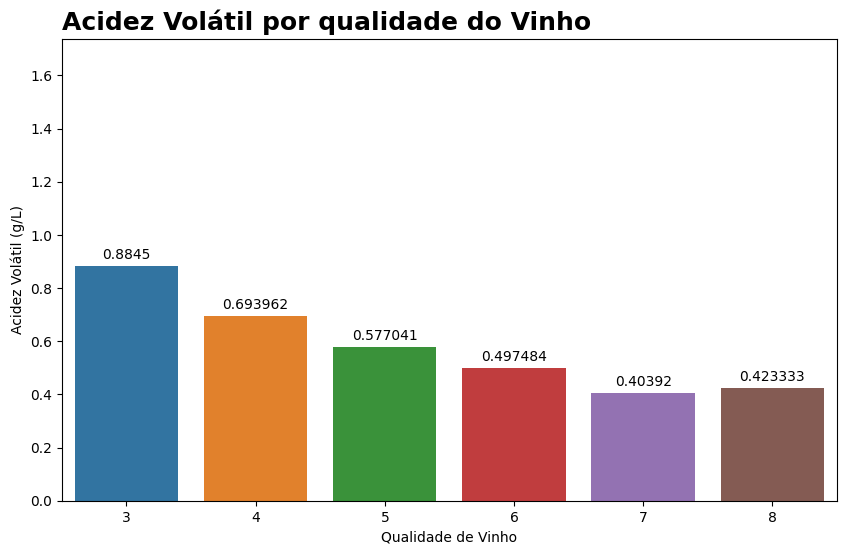

In [33]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=media_acidez_qualidade, x=media_acidez_qualidade.index,y=media_acidez_qualidade['acidez_volatil'], palette='tab10')
plt.title('Acidez Volátil por qualidade do Vinho', fontsize=18, fontweight='bold', loc='left')
plt.ylabel('Acidez Volátil (g/L)')
plt.xlabel('Qualidade de Vinho')
plt.xticks(rotation=360)

y_limite = df_wine_copia.acidez_volatil.max()
plt.ylim(0, y_limite * 1.1)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.show()

**Podemos concluir que quanto maior a qualidade do vinho menor a acidez volátil, com uma média de 0.40 de acidez.**
- Corforme pesquisa feita no site winefun a maioria dos vinhos tem níveis de ácido acético (que é criado pelas bactérias Acetobacter) estão entre 0,3 a 0,5 gramas por litro. Geralmente as leveduras contribuem com 0,1 g/L e as bactérias com 0,2 a 0,4 g/L, nesses níveis a acidez volátil não é perceptível, o limiar de nosso aroma fica entre 0,6 a 0,9 g/L, assim a acidez volátil passa a ser perceptível. temos um problema no caso de preferências tem pessas que gostam com a acidez volátil acima da limiar e outras não, então como as médias de qualidade de vinhos plotadas foram como os manuais antigos de vinificação colocam o patamar entre 0,3 e 0,5 g/L então nosso propósito será buscar manter a média dessa acidez volátil.

Fonte: Winefun  
https://winefun.com.br/acidez-volatil-conheca-um-dos-defeitos-mais-controvertidos-do-mundo-dos-vinhos/

## **Distribuição do teor alcóolico por qualidade do vinho?**

In [19]:
# Quantidade de observações por Teor alcóolico
media_teoralcoolico_qualidade = pd.DataFrame(df_wine_copia.groupby('qualidade_vinho')['teor_alcoolico'].mean())
media_teoralcoolico_qualidade

,teor_alcoolico
qualidade_vinho,
3,9.955000
4,10.265094
5,9.899706
6,10.629519
7,11.465913
8,12.094444


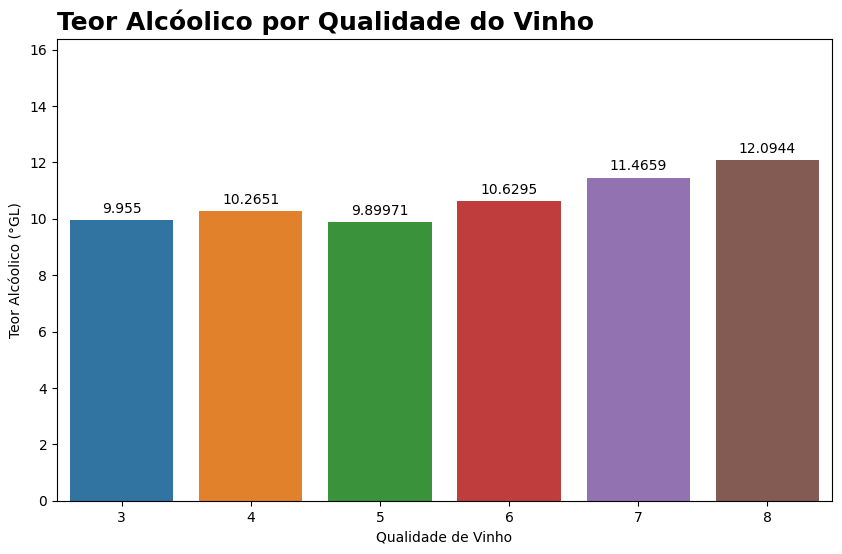

In [34]:
#Teor alcóolico medido em Gay Lussac (°GL) e percentagem

plt.figure(figsize=(10,6))

ax = sns.barplot(data=media_teoralcoolico_qualidade, x=media_teoralcoolico_qualidade.index,y=media_teoralcoolico_qualidade['teor_alcoolico'], palette='tab10')
plt.title('Teor Alcóolico por Qualidade do Vinho', fontsize=18, fontweight='bold', loc='left')
plt.ylabel('Teor Alcóolico (°GL)')
plt.xlabel('Qualidade de Vinho')
plt.xticks(rotation=360)

y_limite = df_wine_copia.teor_alcoolico.max()
plt.ylim(0, y_limite * 1.1)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.show()

**Observando a distribuição de Teor Alcóolico por qualidade do vinho fica bem claro que quão maior a qualidade do vinho mais é o seu teor alcóolico**
- com uma média de 12,10 de teor alcóolico com sua qualidade em nível 8, conforme a winepedia diz em seu artigo o teor alcóolico não pode indicar a qualidade do vinho e que o seu ideal é ficar abaixo de 13% para o vinho se manter equilibrio no paladar e tender a ter corpo mais leve e mais refrescante na boca e a legislação brasileira considera que para ser considreado vinho tem que ficar acima de 7%.
assim podemos acrescentar nessa nossa nova produção de vinho para além de diminuir sua acidez volátil e podemos aumentar o nível de teor alcóolico entre 10.5 à 12.5 trazendo assim uma maior armonia ao nosso vinho e trazendo maior possibilidade de ele ser bem aceito pelos nossos clientes.

link:  
https://www.wine.com.br/winepedia/alcool-pra-que/

# **Classificação Geral de Correlação de Pearson:**  
**Valor da Correlação(r)**----**Intensidade**-----------**Direção**  
-0,70 a -1,00--------------------Forte----------------Negativa    
-0,39 a -0,69---------------Moderada a fraca----------Negativa    
-0,20 a -0,38--------------------Fraca----------------Negativa    
-0,19 a +0,19---------------Praticamente nula----------Neutra    

## **Relação entre acidez volátil e teor alcóolico?**

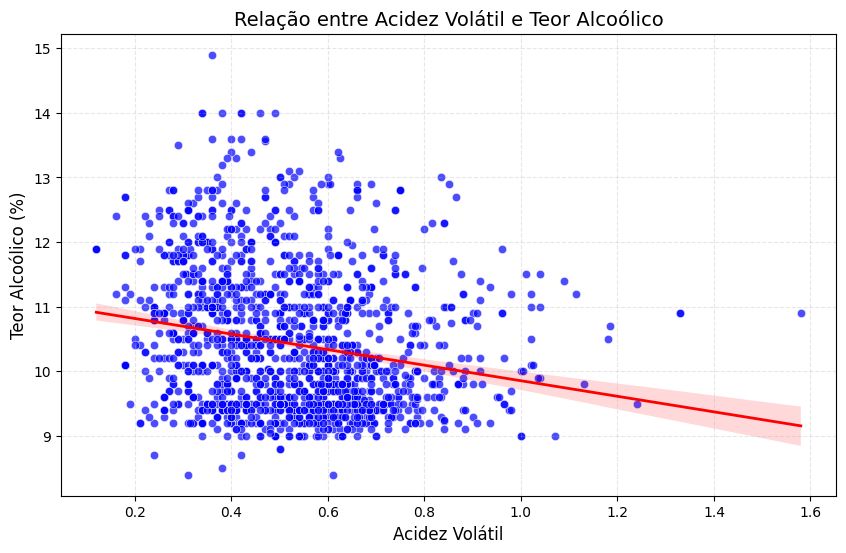

In [21]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_wine_copia, x='acidez_volatil', y='teor_alcoolico', color='blue', alpha=0.7)
sns.regplot(data=df_wine_copia, x='acidez_volatil', y='teor_alcoolico', 
            scatter=False, line_kws={'color': 'red', 'linewidth': 2})  # Linha de regressão
plt.title('Relação entre Acidez Volátil e Teor Alcoólico', fontsize=14)
plt.xlabel('Acidez Volátil', fontsize=12)
plt.ylabel('Teor Alcoólico (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# Obtendo a correlação de Pearson
correlacao = df_wine_copia['acidez_volatil'].corr(df_wine_copia['teor_alcoolico'])
print(f"Coeficiente de correlação de Pearson: {correlacao:.2f}")

Coeficiente de correlação de Pearson: -0.20


**Relação entre Teor Alcoólico e Acidez Volátil**  
Correlação de Pearson: -0,20

**Interpretação:**  
- **Fraca correlação negativa:** Quando a acidez volátil aumenta, o teor alcoólico tende a diminuir levemente.

- **Impacto limitado:** Essa relação é tão suave que outros fatores provavelmente influenciam mais o teor alcoólico.

**Conclusão:**  
A acidez volátil não é um fator relevante para explicar variações no teor alcoólico. Em análises futuras, podemos explorar outras variáveis (como tipo de uva ou tempo de fermentação) para entender melhor o comportamento do álcool no produto.

## **Relação entre acidez volátil e qualidade do vinho?**

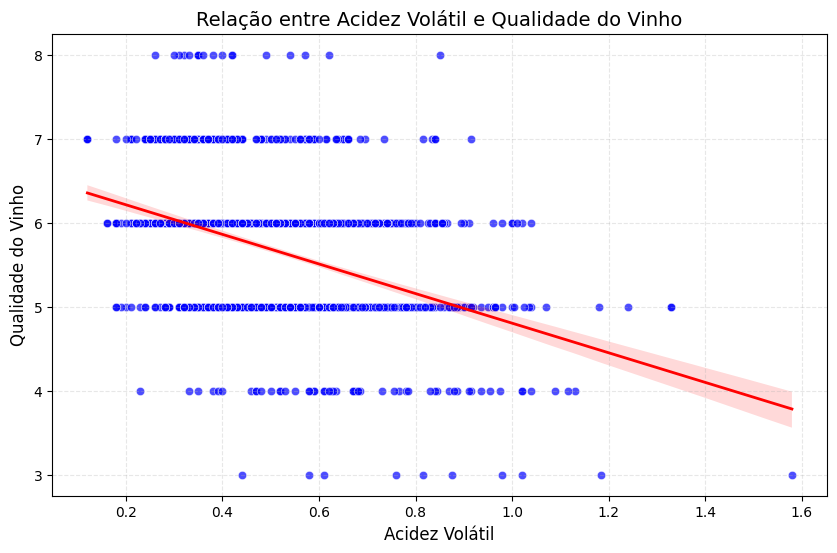

In [26]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_wine_copia, x='acidez_volatil', y='qualidade_vinho', color='blue', alpha=0.7)
sns.regplot(data=df_wine_copia, x='acidez_volatil', y='qualidade_vinho', 
            scatter=False, line_kws={'color': 'red', 'linewidth': 2})  # Linha de regressão
plt.title('Relação entre Acidez Volátil e Qualidade do Vinho', fontsize=14)
plt.xlabel('Acidez Volátil', fontsize=12)
plt.ylabel('Qualidade do Vinho', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# Obtendo a correlação de Pearson
correlacao = df_wine_copia['acidez_volatil'].corr(df_wine_copia['qualidade_vinho'])
print(f"Coeficiente de correlação de Pearson: {correlacao:.2f}")

Coeficiente de correlação de Pearson: -0.39


Ao analisar a relação entre **Acidez Volátil e Qualidade do Vinho temos:**

**Relação inversa:** Valores mais altos de acidez volátil tendem a estar associados a vinhos com notas de qualidade mais baixas.  
**Intensidade moderada:** A relação é perceptível, mas não determinante — outros fatores (como taninos, açúcar residual ou aromas) também impactam a qualidade.

Nossa análise identificou que vinhos com maior acidez volátil tendem a receber avaliações de **qualidade inferiores** (r = -0,39), sugerindo que esse atributo pode ser um indicador de possíveis defeitos. Entretanto, como a correlação é moderada, **recomendamos análises complementares** — como testes sensoriais ou estudo de outras variáveis químicas (ex.: SO₂ livre, pH) — para entender melhor seu impacto real na percepção da qualidade.

**Relação entre Acidez Volátil e Qualidade do Vinho**  
Correlação de Pearson: -0,39

**Interpretação:**  
- **Fraca correlação negativa:** Quando a acidez volátil aumenta, o teor alcoólico tende a diminuir levemente.

- **Impacto limitado:** Essa relação é tão suave que outros fatores provavelmente influenciam mais o teor alcoólico.

**Conclusão:**  
A acidez volátil não é um fator relevante para explicar variações no teor alcoólico. Em análises futuras, podemos explorar outras variáveis (como tipo de uva ou tempo de fermentação) para entender melhor o comportamento do álcool no produto.

## **Qual a acidez volátil média dos vinhos de qualidade elevada?**  
**- A acidez volátil média dos vinhos de maior qualidades é de 0.40 à 0.42 g/L.**

## **Qual a relação entre teor alcóolico e qualidade do vinho?**

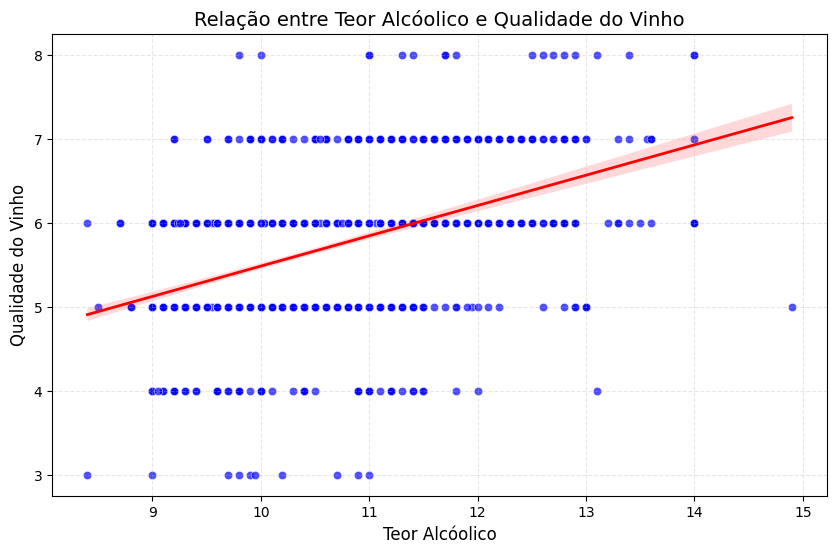

In [28]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_wine_copia, x='teor_alcoolico', y='qualidade_vinho', color='blue', alpha=0.7)
sns.regplot(data=df_wine_copia, x='teor_alcoolico', y='qualidade_vinho', 
            scatter=False, line_kws={'color': 'red', 'linewidth': 2})  # Linha de regressão
plt.title('Relação entre Teor Alcóolico e Qualidade do Vinho', fontsize=14)
plt.xlabel('Teor Alcóolico', fontsize=12)
plt.ylabel('Qualidade do Vinho', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# Obtendo a correlação de Pearson
correlacao = df_wine_copia['teor_alcoolico'].corr(df_wine_copia['qualidade_vinho'])
print(f"Coeficiente de correlação de Pearson: {correlacao:.2f}")

Coeficiente de correlação de Pearson: 0.48


**Relação entre Teor Alcoólico e Qualidade do Vinho**  
Correlação de Pearson: 0,48 (moderada correlação positiva)

**Interpretação:**  
**Relação positiva:** Vinhos com **maior teor alcoólico** tendem a receber **notas de qualidade mais altas**.

**Força moderada:** A correlação (0,48) sugere uma tendência relevante, mas não determinante — outros fatores (como acidez, taninos, equilíbrio sensorial) também influenciam a qualidade.

A correlação não implica que **mais álcool** = **melhor qualidade**, apenas que há uma tendência nos dados analisados.

- Embora exista uma relação moderada (r = 0,48) entre teor alcoólico e qualidade, isso não significa que aumentar o álcool melhora o vinho automaticamente. 

- Recomenda-se analisar outras variáveis (como tipo de uva, região climática ou técnicas de vinificação) para entender completamente os drivers de qualidade.

## **Há alguma relação entre acidez volátil e teor alcóolico?**  
**- Temos uma relação de Pearson negativa fraca de -0.20. Explicado acima**

## **Há alguma relação entre acidez volátil e qualidade do vinho?**  
**- Temos uma relação de Pearson negativa fraca/moderada de -0.39. Explicado acima**